In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.model_selection import cross_val_score

In [6]:
wine_df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\wine.csv')
wine_df.head()

,Class,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
wine_df['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [8]:
print("Class Distribution:")
print(wine_df['Class'].value_counts(normalize=True))

Class Distribution:
2    0.398876
1    0.331461
3    0.269663
Name: Class, dtype: float64


In [9]:
le = LabelEncoder()
y = le.fit_transform(wine_df['Class'])  # Convert 'No'/'Yes' to 0/1
X = wine_df.drop('Class', axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [11]:
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
ct = make_column_transformer(
    ('passthrough', make_column_selector(dtype_exclude=object)),
    (ohe, make_column_selector(dtype_include=object)), 
    verbose_feature_names_out=False
).set_output(transform='pandas')


pipe = Pipeline([
    ('ct', ct),
    ('lr', LogisticRegression())
])

pipe.fit(X_train, y_train)    

C:\Users\DAI.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000015F7D4919D0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000015F7D491AC0>)],
                                   verbose_feature_names_out=False)),
                ('lr', LogisticRegression())])

Model Score

In [12]:
y_pred = pipe.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.9074074074074074


Naive Score

In [13]:
mode = pd.Series(y_test).mode()[0]
majority_class = np.full(len(y_test), mode)
print("Naive Classifier Accuracy:", accuracy_score(y_test, majority_class))

Naive Classifier Accuracy: 0.3888888888888889


### KFoldCV

In [14]:
cv_results = cross_val_score(pipe, X, y, cv=5)
print("\nCross Validation Scores:", cv_results)
print("Mean CV Score:", cv_results.mean())
print("CV Score Standard Deviation:", cv_results.std())

C:\Users\DAI.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DAI.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m


Cross Validation Scores: [0.88888889 0.94444444 0.94444444 1.         1.        ]
Mean CV Score: 0.9555555555555555
CV Score Standard Deviation: 0.041573970964154924


C:\Users\DAI.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

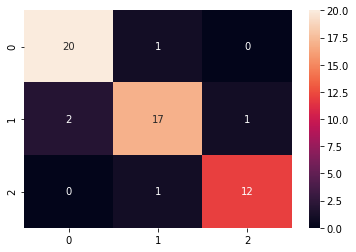

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')